<h1 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Prediction Agreement Reached (PAR) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2;">

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">Required Imports</h2>

<hr style="border: 2px solid #4A90E2;">

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">Package Descriptions</h3>
<ul style="font-family: 'Arial', sans-serif;">
    <li><strong>pandas</strong>: For data manipulation and analysis, enabling easy reading and handling of dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array manipulation.</li>
    <li><strong>matplotlib.pyplot</strong>: To create data visualizations and plots.</li>
    <li><strong>seaborn</strong>: For generating attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand data quality.</li>
</ul>


In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sys # type: ignore
import os # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from imblearn.over_sampling import SMOTE # type: ignore


sys.path.append(os.path.abspath("../utils"))
from meta_model_train import meta_model_lr
from neural_network import neural_network
from plots import plot_training_history, plot_confusion_matrix
from predicitons_csv import save_predictions_to_csv_ar
from save_models import save_model

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Data Loading
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section handles loading the dataset into the environment for further processing. Using <strong>pandas</strong>, we load the data into a structured dataframe, allowing for easy manipulation, exploration, and analysis throughout the project.
</p>


In [2]:
path = "../data/"

X_train_ar = pd.read_csv(path + "X_train_ar_post_FS.csv")
y_train_ar = pd.read_csv(path + "y_train_ar_post_FS.csv")
X_val_ar = pd.read_csv(path + "X_val_ar_post_FS.csv")
y_val_ar = pd.read_csv(path + "y_val_ar_post_FS.csv")

data_test_ar = pd.read_csv(path + "data_test_ar_post_FS.csv")

data = pd.read_csv(path + "Agreement_Reached_mapping.csv")

In [3]:
mapping_dict = dict(zip(data['Encoded Value'], data['Agreement Reached']))

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Model Selection
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section focuses on selecting the best-performing models for predicting workers' compensation claims outcomes. Various machine learning algorithms are evaluated based on their accuracy, interpretability, and suitability for the dataset, ensuring an optimal balance between predictive performance and computational efficiency.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 2px 2px #D1D1D1;">Logistic Regression</h3>

In [4]:
models_lr, f1_scores_lr, oof_predictions_lr, test_predictions_lr = meta_model_lr(
            X_train_ar, y_train_ar, data_test_ar, n_splits_n=5, num_classes_n=y_train_ar['Agreement Reached'].nunique()
)

2024-12-18 01:09:57,726 - INFO - Início do treinamento do lr.
2024-12-18 01:09:57,793 - INFO - Training Fold 1...
2024-12-18 01:11:42,338 - INFO - Fold 1 concluído em 104.55s - F1: 0.4881, Acc: 0.9533
2024-12-18 01:11:42,476 - INFO - Training Fold 2...
2024-12-18 01:13:26,834 - INFO - Fold 2 concluído em 104.36s - F1: 0.4881, Acc: 0.9533
2024-12-18 01:13:27,304 - INFO - Training Fold 3...
2024-12-18 01:15:11,447 - INFO - Fold 3 concluído em 104.14s - F1: 0.4881, Acc: 0.9533
2024-12-18 01:15:11,599 - INFO - Training Fold 4...
2024-12-18 01:16:56,118 - INFO - Fold 4 concluído em 104.52s - F1: 0.4881, Acc: 0.9533
2024-12-18 01:16:56,598 - INFO - Training Fold 5...
2024-12-18 01:18:36,587 - INFO - Fold 5 concluído em 99.99s - F1: 0.4881, Acc: 0.9533
2024-12-18 01:18:36,928 - INFO - Treinamento concluído. F1-Score Médio: 0.4881


F1-Score Médio: 0.4881


In [5]:
nn_model_lr, X_nn_train, X_nn_val, y_nn_val, y_nn_train, early_stopping, reduce_lr = neural_network(oof_predictions_lr, y_train_ar)

history = nn_model_lr.fit(
    X_nn_train, y_nn_train,
    validation_data=(X_nn_val, y_nn_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

save_model(nn_model_lr, "LR_NN_model_ar")

Epoch 1/10
5649/5649 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8872 - loss: 0.4290 - val_accuracy: 0.9538 - val_loss: 0.1996 - learning_rate: 0.0010
Epoch 2/10
5649/5649 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9532 - loss: 0.1918 - val_accuracy: 0.9538 - val_loss: 0.1872 - learning_rate: 0.0010
Epoch 3/10
5649/5649 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9525 - loss: 0.1927 - val_accuracy: 0.9538 - val_loss: 0.1872 - learning_rate: 0.0010
Epoch 4/10
5649/5649 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9540 - loss: 0.1876 - val_accuracy: 0.9538 - val_loss: 0.1872 - learning_rate: 0.0010
Epoch 5/10
5649/5649 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9526 - loss: 0.1916 - val_accuracy: 0.9538 - val_loss: 0.1874 - learning_rate: 0.0010
Epoch 6/10
5649/5649 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9530 - loss: 0.1900 - val_accuracy: 0.9538 - val_loss: 0.1875 - learning_rate: 0.0010
Epoch 7/10
5649/5649 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9

'../models/LR_NN_model_ar.pkl'

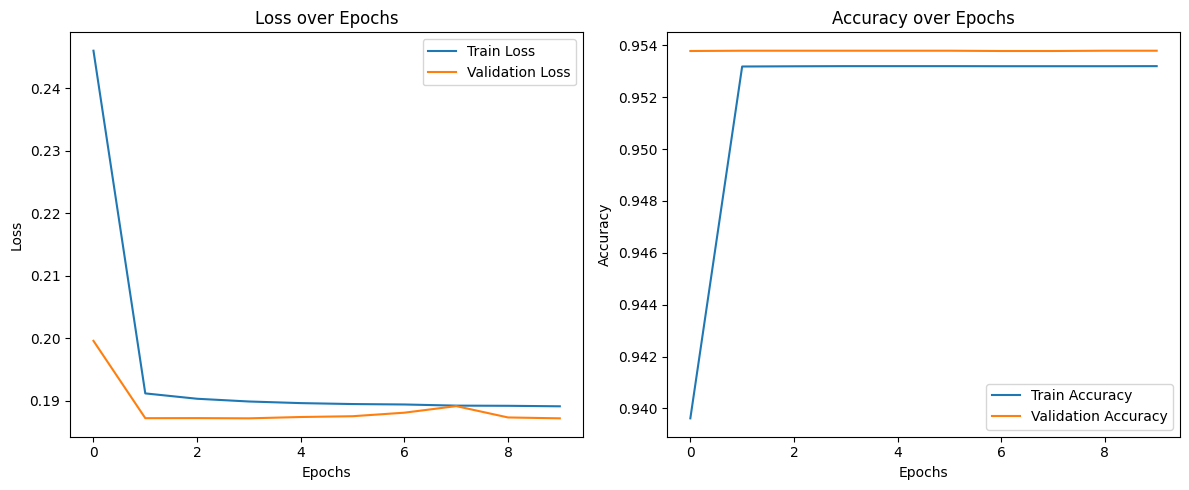

In [6]:
plot_training_history(history)

2825/2825 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step


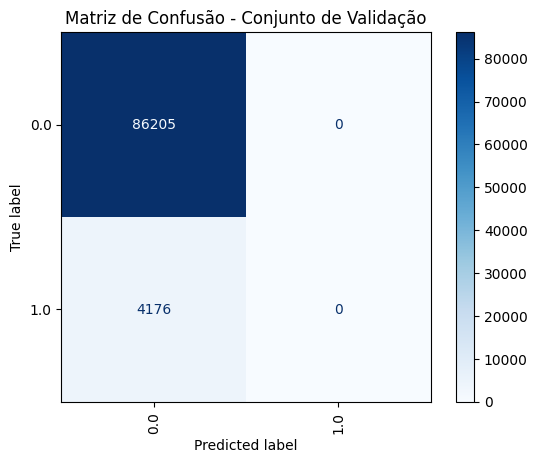

TypeError: object of type 'float' has no len()

In [8]:
plot_confusion_matrix(model=nn_model_lr, X_val=X_nn_val, y_val=y_nn_val,
    class_mapping=mapping_dict , title="Matriz de Confusão - Conjunto de Validação"
)

In [9]:
save_predictions_to_csv_ar(
    model=nn_model_lr,
    test_data=test_predictions_lr,
    claim_ids=data_test_ar["Claim Identifier"],
    output_path="../predictions/group_40_KFold_LR_NN_predictions_AR.csv"
    )

12125/12125 ━━━━━━━━━━━━━━━━━━━━ 10s 795us/step
Predições salvas em '../predictions/group_40_KFold_LR_NN_predictions_AR.csv'.


In [10]:
predicitons_data = pd.read_csv('../predictions/group_40_KFold_LR_NN_predictions_AR.csv')
values = predicitons_data['Agreement Reached'].value_counts()
values

Agreement Reached
0    387975
Name: count, dtype: int64